In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# 이미지를 파일로 출력하고 로딩한다음 글씨만 추출

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

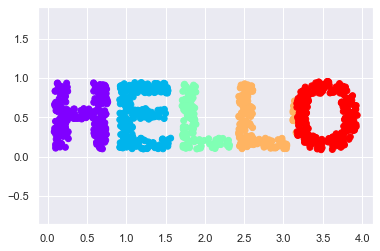

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

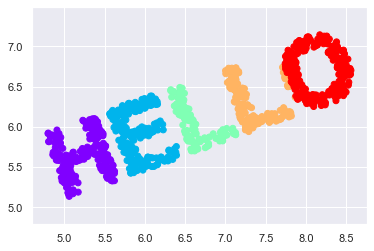

In [4]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행열회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R) #1000*2  2*2 => 1000*2
X2 = rotate(X,20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

(1000, 1000)


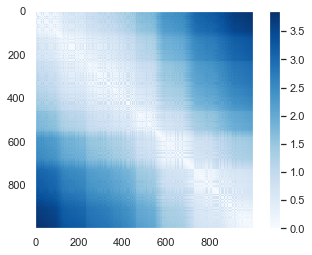

In [5]:
# 각 점들간의 상호거리 #디폴트  
from sklearn.metrics import pairwise_distances #  /유클리디안거리
D = pairwise_distances(X) # 거리행렬
print(D.shape)
D[:5,:5]
plt.imshow(D, zorder=2, cmap='Blues', interpolation = 'nearest')
plt.colorbar()

In [6]:
D2 = pairwise_distances(X2)
np.allclose(D,D2) # 원형을 유지하고 있음

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


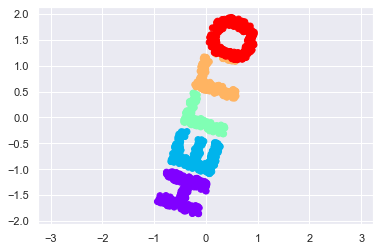

In [7]:
# 다형체
from sklearn.manifold import MDS
# 미리 계산된 거리행렬을 이용해 차원축소함
# n_components = 2  /2차원
model = MDS(n_components = 2, dissimilarity = 'precomputed', #미리 계산되어진 거리행열
           random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')
print(out)

In [8]:
# 고유값 분해
import numpy as np
rng = np.random.RandomState(10)
C = rng.randn(3,3) # normal
print(np.dot(C,C.T)) #전치 행렬, 행렬의 거듭제곱
# 정방행렬 과 대칭행렬이 나옴~~
e,V = np.linalg.eigh(np.dot(C,C.T))
print("eigenvector", V) # 고유벡터
print("eigenvalue", e)# 고유값
np.dot(V[1],V[2]) # 두벡터의 내적 -> 직교

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [9]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1] # 행,열 (2차원) -> 차원확대만가능
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3*3 
    print("C는", C.shape)
    print(np.dot(C,C.T)) # 정방행열, 대칭
    e,V = np.linalg.eigh(np.dot(C,C.T)) # 고유치와 , 고유벡터
    print("V는", V.shape) # 3*3
    print("차원은", V[:X.shape[1]]) # 2
    return np.dot(X,V[:X.shape[1]]) # 3*2
print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

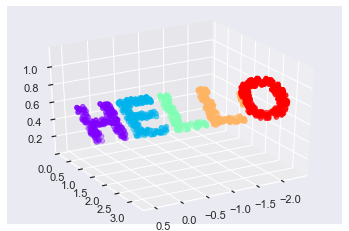

In [27]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2],
            **colorize)
ax.view_init(azim=60,elev=30) # azim 좌우로 elev 상하로 카메라다가 보는각도 3차원에서~

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

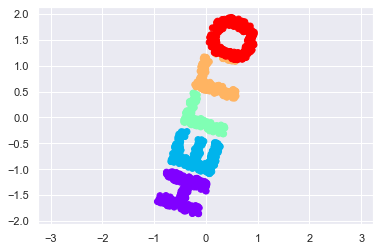

In [28]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.axis('equal')

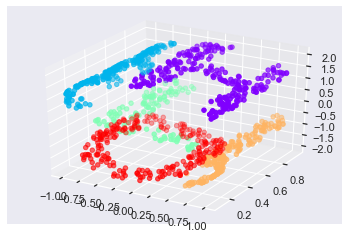

In [35]:
def make_hello_s_curve(X):
    t = (X[:,0]-2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0], XS[:,1],XS[:,2], **colorize)

(-1.3226393849603086,
 1.1799486556119945,
 -2.1918230064186113,
 2.3891359457585013)

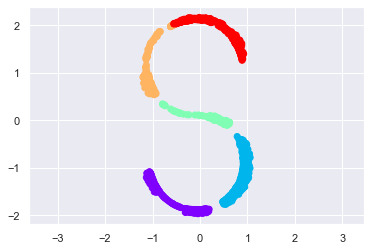

In [34]:
# MDS 는 비선형에서 모양유지가 안됨
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.axis('equal')

In [ ]:
# LLE(locally linear embedding)
-비선형에 강함

(0.15, -0.15)

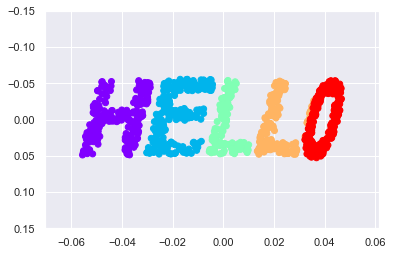

In [38]:
# 다시 2차원으로 표시
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components =2,
                              method = 'modified', eigen_solver = 'dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15,-0.15)

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import numpy as np
import os
CHART_DIR = "./"
colors = ['r','g','b']
markers = ["o",6,'*']

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)
    Xtrans = mds.fit_transform(X)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 카메라 각도

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 

C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_06\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

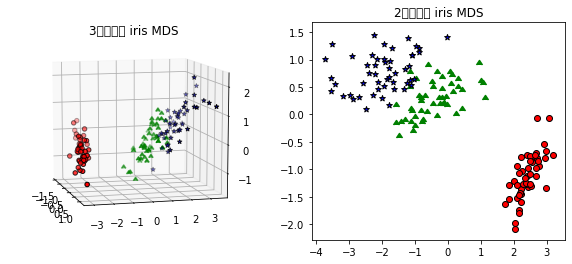

In [5]:
plot_iris_mds()

# kmeans : 군집분석  ->  종속변수결정
- 압축 : 팔레트 , 실제데이터에는 팔레트 번호를 넣어서 한번 참조함(256) = 1byte로 표현이가능
- 원형이상치 제거
- 미리 군집화해서 문제해결에 도움을 줌 
# 알고리즘 - k값을 결정 (군집수결정), 중심값 : 중심이 변화(재계산)
- 문제점 : 이상치에 민감
# kmeans의 척도 : 거리값 (피타고라스 정리 -> euclidian distance)
# DBSCAN : eps 기본 거리값, 군집이 되기 위한 최소요소수 
- 핵심, 경계, 어느 군집에도 속하지 않는 것 / 총 3개로 나눠짐




k 값을 결정 , 중심갑 - 두개를 넣어야하는데 잘모름..ㅋㅋ

In [9]:
import numpy as np
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22,71.60,-65.755], dtype = np.float64)
b_64 = np.array([61.22,71.608,-65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm은 원점으로 부터의 크기 ( 단일 벡터 )
dist_64_np = np.array([np.linalg.norm(a_64 -b_64)],
                     dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 -b_32)],
                     dtype = np.float32)
# euclidean distance 기본값
ist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric = 'manhattan')
    

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
from sklearn.svm import SVC # Classifiction 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #전처리 preprocessing 정규화해서 처리~
# kmeans, PCA 전처리에 민감함
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train) # chaining
X_train_scaled = scaler.transform(X_train)
svm =SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트점수 : {:.2f}".format(svm.score(X_test_scaled,y_test)))

테스트점수 : 0.95


C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(" 최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트점수: {:.2f}".format(grid.score(X_test_scaled,y_test)))
print("최적의 매개변수: ", grid.best_params_)

 최상의 교차 검증 정확도 : 0.98
테스트점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# 참조 : 파라미터 전달
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train,y_train)
print("train점수: {:.2f}".format(pipe.score(X_test,y_test)))

train점수: 0.95


C:\Users\ICT01_06\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# pipeline + GridSearchCV는 다양한 테스트 문제를 해결
from sklearn.model_selection import GridSearchCV
# regularization : 규제 : 과적합을 제하기위해!
from sklearn.svm import SVC
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100], # 처음엔 대충넣고 최적의 매개변수찾으면 그 수에 맞춰서 세부적으로 나눠서 테스트
             'svm__gamma' : [0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트점수: {:.2f}".format(grid.score(X_test_scaled,y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트점수: 0.97
최적의 매개변수:  {'svm__C': 1, 'svm__gamma': 1}


array([[6.91025641, 3.08717949],
       [4.76666667, 2.89166667],
       [5.1875    , 3.6375    ],
       [5.93818182, 2.77090909]])

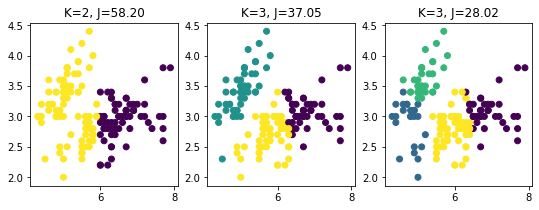

In [49]:
# 초기 중심값이 결정 입력 => 중심은 지속적으로 변화됨~
# 중심과의 거리값  /거리값이 멀어있으면 문제임
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:,:2] # 전체변수 4 -> 2개
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(9,3)); plt.subplot(131)
plt.scatter(X[: ,0], X[:,1],c=km2.labels_) # 컬러 2
plt.title("K=2, J=%.2f" % km2.inertia_) #군집 내부 거리값
# inertia = 중심점으로부터의 거리제곱의 합
plt.subplot(132); plt.scatter(X[:,0],X[:,1],c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133); plt.scatter(X[:,0],X[:,1],c=km4.labels_)
plt.title("K=3, J=%.2f" % km4.inertia_)
km4.cluster_centers_ # 중심값

In [ ]:
km4.cluster_centers_ # 중심값 !!

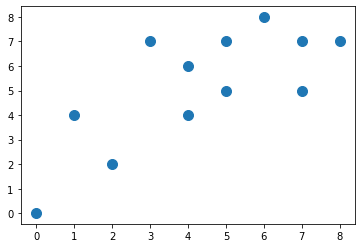

In [51]:
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],
             [0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

In [53]:
X.shape

(12, 2)

12


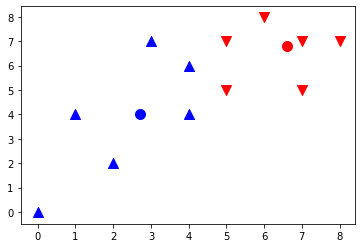

In [61]:
from sklearn.cluster import KMeans
# 레이블 : 군집번호 : 종속변수
model = KMeans(n_clusters=2, init ="random", n_init=1, max_iter=1,random_state=1).fit(X)
c0,c1 = model.cluster_centers_
print(len(model.labels_))
# boolean index / label이 0인것만 찾아라~ true니깐~
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100,
           marker ='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100,
           marker ='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()

In [58]:
c0,c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

# IMAGE~~ 변형 및 출력~ KMEANS~

In [18]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family =font_name)

In [20]:
n_color = 64
# 1바이트 = 8비트 =표현종류 -> 256가지~
china = load_sample_image("flower.jpg") # RGB
# 컬러값 정규화 0~1정규화
china = np.array(china, dtype=np.float64)/255

In [21]:
w, h, d = original_shape = tuple(china.shape) # 이미지 행*열, 3
print(w, h ,d)
assert d == 3 # RGB만 들어와라~
image_array = np.reshape(china, (w*h,d)) # 2차원으로

427 640 3


In [22]:
# 1000개의 행
image_array_sample = shuffle(image_array, random_state = 0)[:1000]
# 64컬러로 군집화
kmeans = KMeans(n_clusters=n_color, random_state=0).fit(image_array_sample) #중심값 결정 64개

In [23]:
labels = kmeans.predict(image_array) # 라벨

In [24]:
def recreate_image(codebook, labels, w, h): # codebook은 64컬러값, labels=이미지픽셀값
    d = codebook.shape[1] # 64 개의 중심값  64*3
    image = np.zeros((w,h,d)) # 원래 이미지 사이즈
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

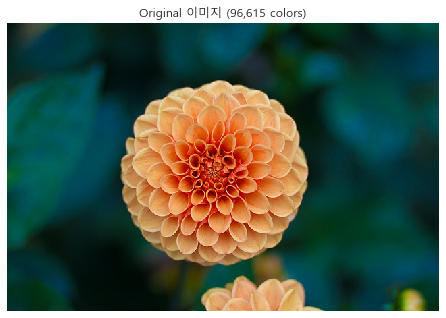

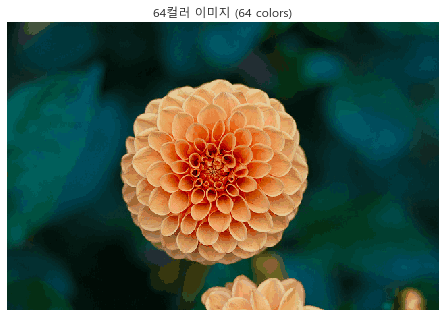

In [25]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('64컬러 이미지 (64 colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels,w,h))

In [26]:
image = plt.imread("12.jpg")
plt.figure(figsize=(15,8))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: '12.jpg'

In [ ]:
image.shape

In [ ]:
# 바이트수
image.shape[0] * image.shape[1] * image.shape[2]

In [ ]:
from sklearn import cluster
x,y,z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x*y,z) # kmeans는 3차원을 이해하지못함! 2차원만
image_2d.shape

In [ ]:
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

In [ ]:
len(cluster_centers)

In [27]:
cluster_centers.shape

NameError: name 'cluster_centers' is not defined

In [28]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

NameError: name 'kmeans_cluster' is not defined

In [29]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

NameError: name 'cluster_centers' is not defined

<Figure size 1080x576 with 0 Axes>

In [30]:
# 원형 이상치 제거

In [31]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)

In [32]:
kmeans = KMeans(n_clusters=1) # 중심 1개
kmeans.fit(X)
distances = kmeans.transform(X) # 각 데이터의 중심으로 부터 값으로 변환
# ravel() 1차원으로 만들때 ~
# argsort = 인덱스를 sort해라 ~ 이값으로 다른값을 컨트롤 하고싶어서~
# 2개가
# 내림차순으로 변경
# [::-1] 꺼꾸로~
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

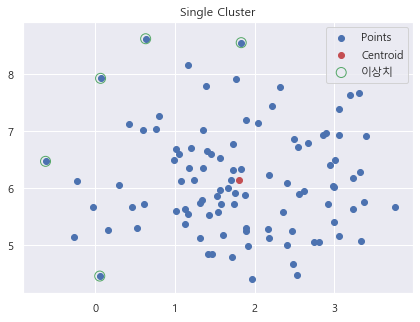

In [33]:
f, ax = plt.subplots(figsize =(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:,0],X[:,1],label = 'Points')
ax.scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
          label = 'Centroid', color = 'r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label='이상치', edgecolors='g',
          facecolors='none',s=100)
ax.legend(loc='best')

In [34]:
# PCA : Principle component Analysis
# 모델 입력 전단에서 특징 추출 (noise 제거)
# PCA의 결과를 모델의 변수로 추가하면 정확도가 상승해서 ***
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
pca = PCA(n_components=2) # 주성분을 2개로 해라~
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력!! 중요~ / 축이름을 재명령 해야함~


[0.99244289 0.00755711]


# 차원축소후에 분석을 하면 좋은점
- noise 제거
- 속도가 개선
- 차원의 저주(차원이 많으면 복잡해서;;) -> 복잡한 문제를 해결


In [35]:
print(pca.explained_variance_) # 분산이 큰것이 주성분~~!
print(pca.noise_variance_) # Noise

[7.93954312 0.06045688]
0.0


In [36]:
# svd 희소행렬 특징추출
# 500*500 이면 써라 = randomized
# arpack = 0을 없애서 출력해라~
pca = PCA(n_components=2, svd_solver='full') # singular value decomposition

pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [38]:
# scaler 안한거~
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도:{:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도:0.63


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
# scaler한거~
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396]
원본데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 18)


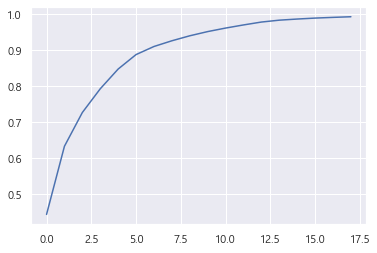

In [41]:
pca = PCA(n_components = 18)
pca.fit(X_scaled)
# 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
# 569,30 / 28개의 특성을 제거~
print("원본데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

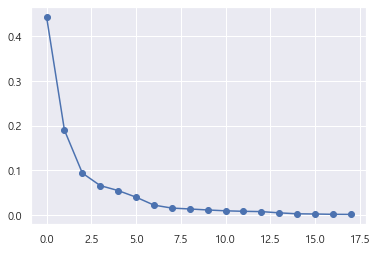

In [42]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [43]:
# 매우중요함~!!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 정규화 z 점수~
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=6) # 전체 변수 30개
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_t_test,y_test)))

# 6 : 97%
# 9 : 97%

SVM 테스트 정확도: 0.97


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
# 6,30 주성분을 60개의 변수가 설명 -> 주성분 축 : 명명
# 변수의 기여도를 보고 명명식

PCA 주성분 형태: (6, 30)


In [45]:
print("PCA 주성분 : {}".format(pca.components_))

PCA 주성분 : [[ 2.21365239e-01  1.00002186e-01  2.29518109e-01  2.23520981e-01
   1.43022884e-01  2.42110713e-01  2.60269250e-01  2.64252721e-01
   1.34215403e-01  5.85049993e-02  2.06864788e-01  7.29622255e-03
   2.09874216e-01  2.02238408e-01  1.72518718e-02  1.66390255e-01
   1.38559209e-01  1.79940925e-01  2.94390431e-02  1.01929667e-01
   2.30419562e-01  1.00571999e-01  2.37796607e-01  2.27510089e-01
   1.31359787e-01  2.10778835e-01  2.30141898e-01  2.53344062e-01
   1.19116509e-01  1.30882592e-01]
 [-2.30173200e-01 -5.72175515e-02 -2.13355030e-01 -2.26935339e-01
   1.78770408e-01  1.47448613e-01  6.55746283e-02 -3.13406669e-02
   1.90507115e-01  3.63961224e-01 -1.05013647e-01  9.39735986e-02
  -9.74743957e-02 -1.49610324e-01  2.12040027e-01  2.35434997e-01
   2.10509206e-01  1.52280137e-01  1.81074900e-01  2.78679424e-01
  -2.15982904e-01 -4.24949684e-02 -2.00035990e-01 -2.15181923e-01
   1.71468563e-01  1.38831730e-01  1.05033622e-01  6.40329376e-04
   1.40657666e-01  2.73186544e-

C:\Users\ICT01_02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


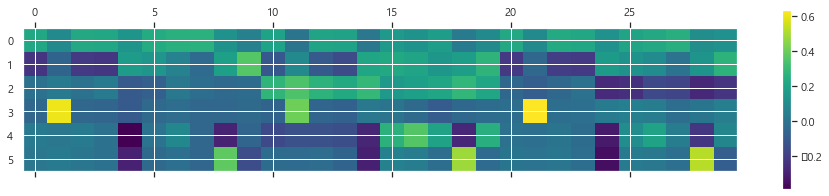

In [46]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

(87, 65)


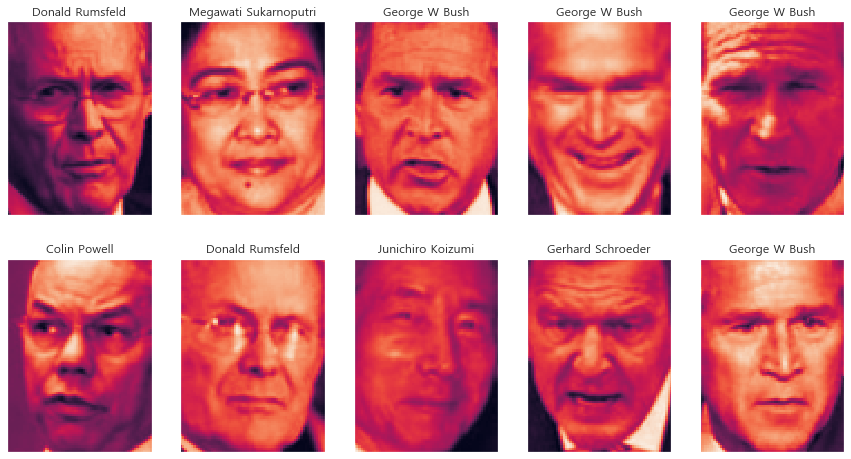

In [47]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape) # 87*65 , 이미지를 가로x세로, 행렬 행부터
fig, axes = plt.subplots(2,5,figsize = (15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images,
                            axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [48]:
print("이미지사이즈 :{}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

이미지사이즈 :(1742, 87, 65)
클래스 개수: 22


In [49]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_poeple = X_people/255.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=0)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train) # 주성분을 100개만 만들자.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

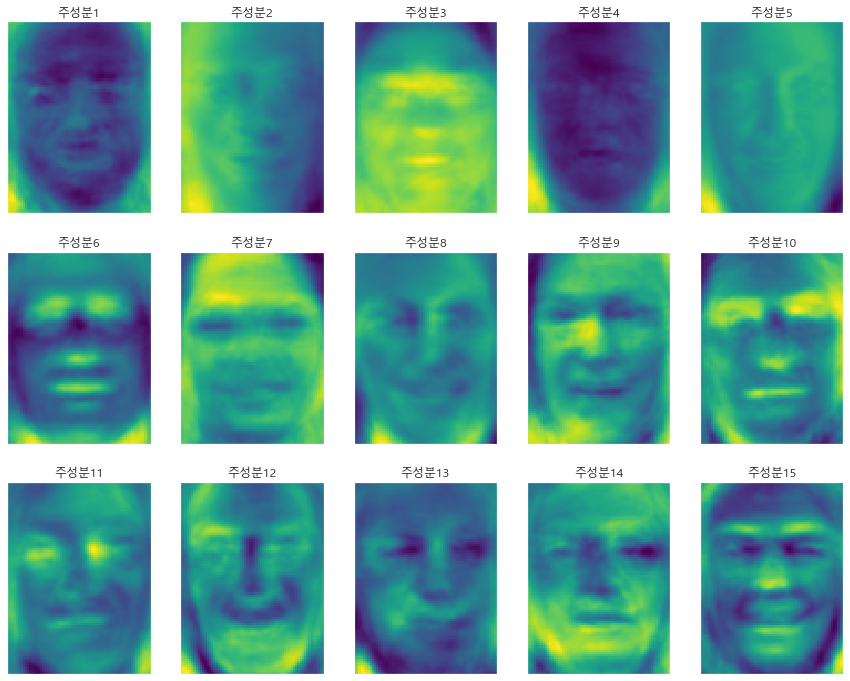

In [52]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분{}".format((i+1)))

In [ ]:
# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
컴퓨터가 뽑아낸 주성분 100개를 합하여 출력 원복이미지를 복원할 수 있다. 

컴퓨터가 찾아낸 특징은 설명할 수 없다.=>ANN 의 가중치특징도 설명할 수 있다. 
설명할수 없지만 쓸 수 있다. ㅋㅋㅋㅋㅋㅋㅋㅋㅋ